In [ ]:
# import required modules for transcription
import speech_recognition as sr
from os import path
from pydub import AudioSegment
from pydub.utils import which

# import required module to export transcription as docx 
from docx import Document

# import required modules for voice recorder
import sounddevice
from scipy.io.wavfile import write
# sample rate
fs=44100

# import the GUI for the interface for Voice to text transcriber
import PySimpleGUI as sg

# Set the  audio converter to ffmpeg to change file from .mp3 to .wav
AudioSegment.converter = which("ffmpeg")

 

# Set the theme for GUI
sg.theme('Default1')

# Prompt user to enter countdown time
layout = [
            [sg.Text("Voice to Text Transcriber\n")],
# Ask to upload PDF file
            [sg.Text("Set your timer in seconds: "), sg.InputText(size = (25,1), key = "-TIMER-")],
            [sg.Text("Select a folder destination: "), sg.Input(size=(25,1), key="-FOLDER-"), sg.FolderBrowse()],
            [sg.Text("Choose a file name: "), sg.InputText(size=(25,1), key="-FILE-")],
            [sg.Text("\n")],
            [sg.Button('Record'),sg.Button('Cancel')]
            
]

# Create the Window
window = sg.Window('PDF to docx File Convertor', layout)

while True:
        # Storing user input (timer, folder destination, file name)
        event, values = window.read()
        second = int(values['-TIMER-'])
        folder = values['-FOLDER-']
        voice = values['-FILE-']+'.mp3'
       
        if event == sg.WIN_CLOSED or event == 'Cancel':
            break
            
        if event == 'Record':
            
            # Voice recorder works by a few step:
            # 1. Sets a timer 
            # 2. Stores recording in a .mp3 audio file
        
            sg.popup("Recording in process...\n")
            record_voice=sounddevice.rec(int(second * fs),samplerate = fs,channels = 2)
            sounddevice.wait()
            write(folder +'/'+ voice,fs,record_voice)
            sg.popup("Recording is done. Please check your folder to listen recording.")
            
            # Audio transcription works by a few steps:

            # 1. mp3 to wav conversion,
            # 2. loading the audio file,
            # 3. feeding the audio file to a speceh recongition system.
            
            src = folder + '/' + voice
            dst = folder + '/' + values['-FILE-'] + '.wav'

            # Convert mp3 file wav
            try:
                sound = AudioSegment.from_file(src, "mp3")
            except:
                sound = AudioSegment.from_file(src, format="wav")
    
            sound.export(dst, format = "wav")

            # Transcribe audio file
            AUDIO_FILE = dst

            # Use the audio file as the audio source
            r = sr.Recognizer()
            with sr.AudioFile(AUDIO_FILE) as source:
            # Read the entire audio file
                audio = r.record(source)
            text = "Transcription: " + r.recognize_google(audio)
            sg.popup("Successfuly transcribed the recording.\n" + "Please view the transciption in " + folder + " folder.")
            
            document = Document()
            document.add_heading('Voice to Text Transciber', level=1)
            document.add_paragraph(text)

            document.save(folder + '/' + values['-FILE-'] + '.docx')
            
            
# Break while loop if window is closed or user clicks cancel
        elif event == sg.WIN_CLOSED or event == 'Cancel':
            break
        else:
            sg.popup_error("Enter valid input")
        
# if user closes window or clicks cancel
        if event == sg.WIN_CLOSED or event == 'Cancel':
            break
        
# Close window   
window.close()  


### 1. Set the recording time in seconds
### 2. Select the folder to save recording and transcription files

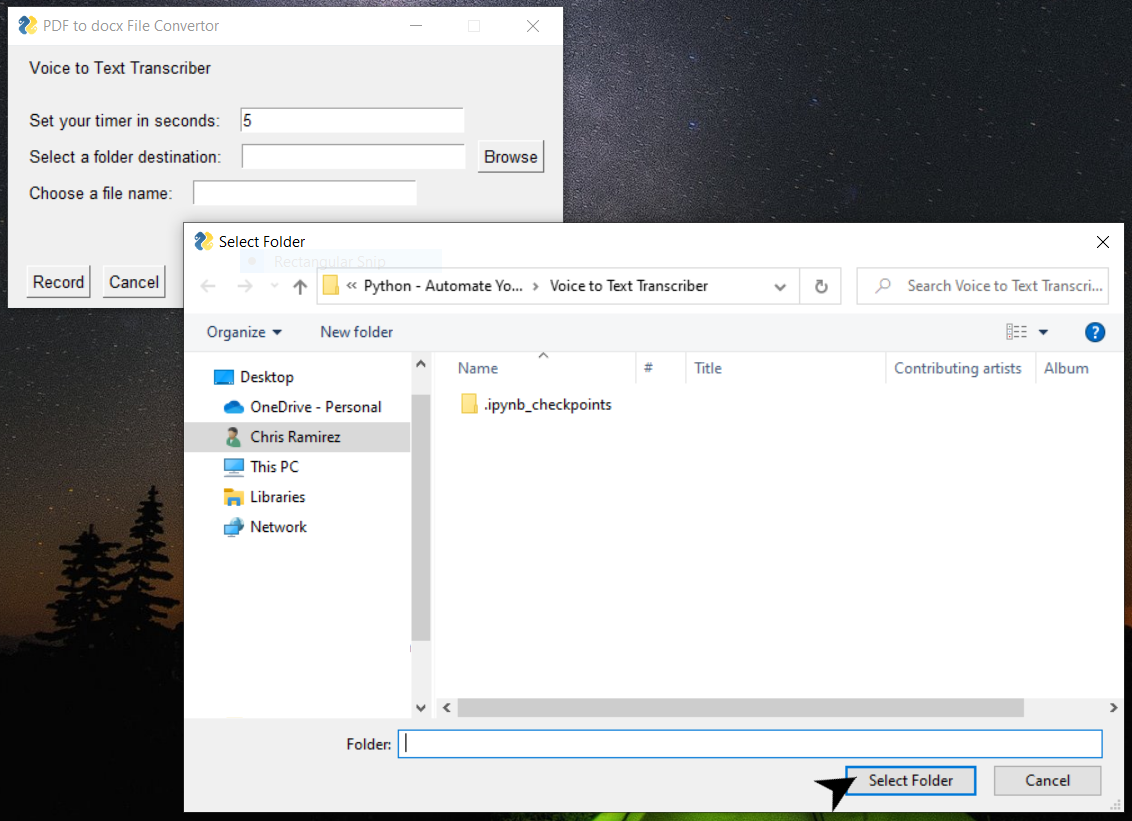

### 3. Enter a file name for recording 
### 4. Click on Record when ready and OK on popup window

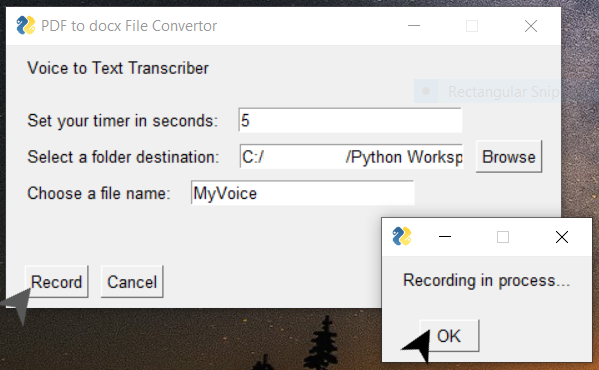

### 5. Popup window will notify you when recording ended
### 6. Click on OK to close popup window
### Note: The recording and the docx transcription files will be saved to the destination folder


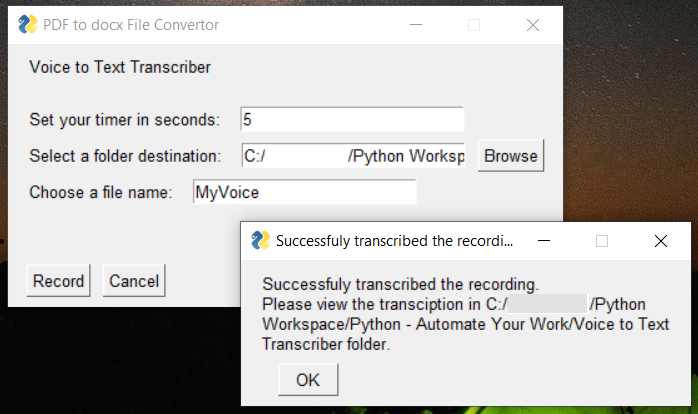

### 7. The orginal recording .mp3 file, the converted recording .wav file used by transcribe audio process and the docx file of the transcription is found in the destination folder chosen by user at the start.

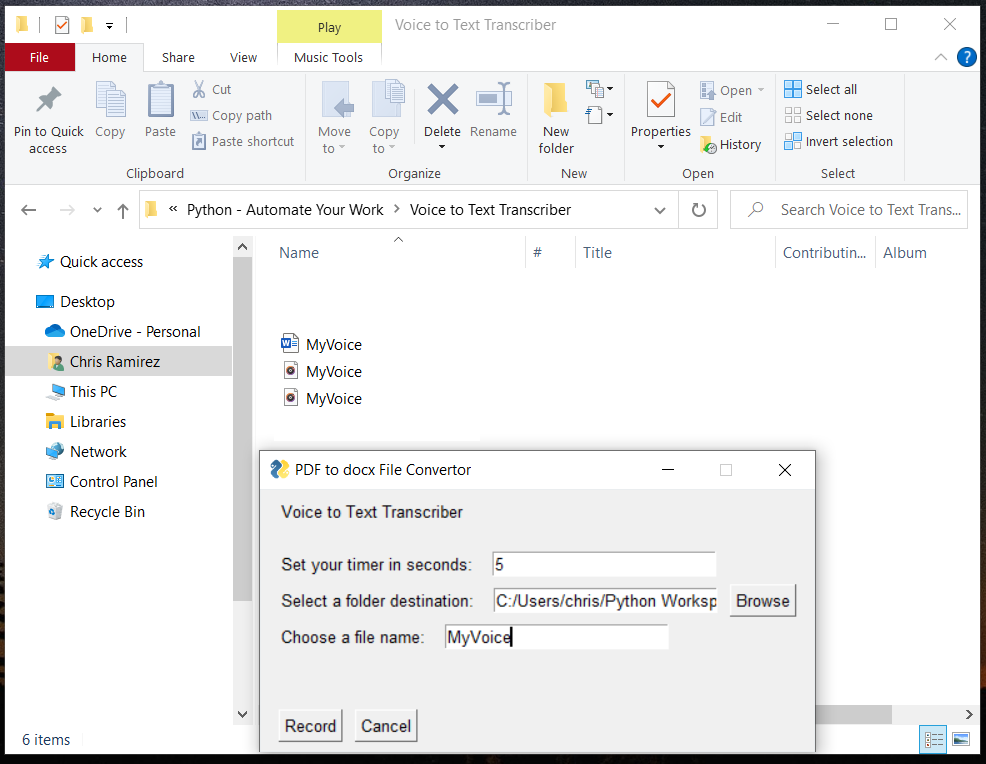

### 8. User can open the .docx file to view the transcription of recording.

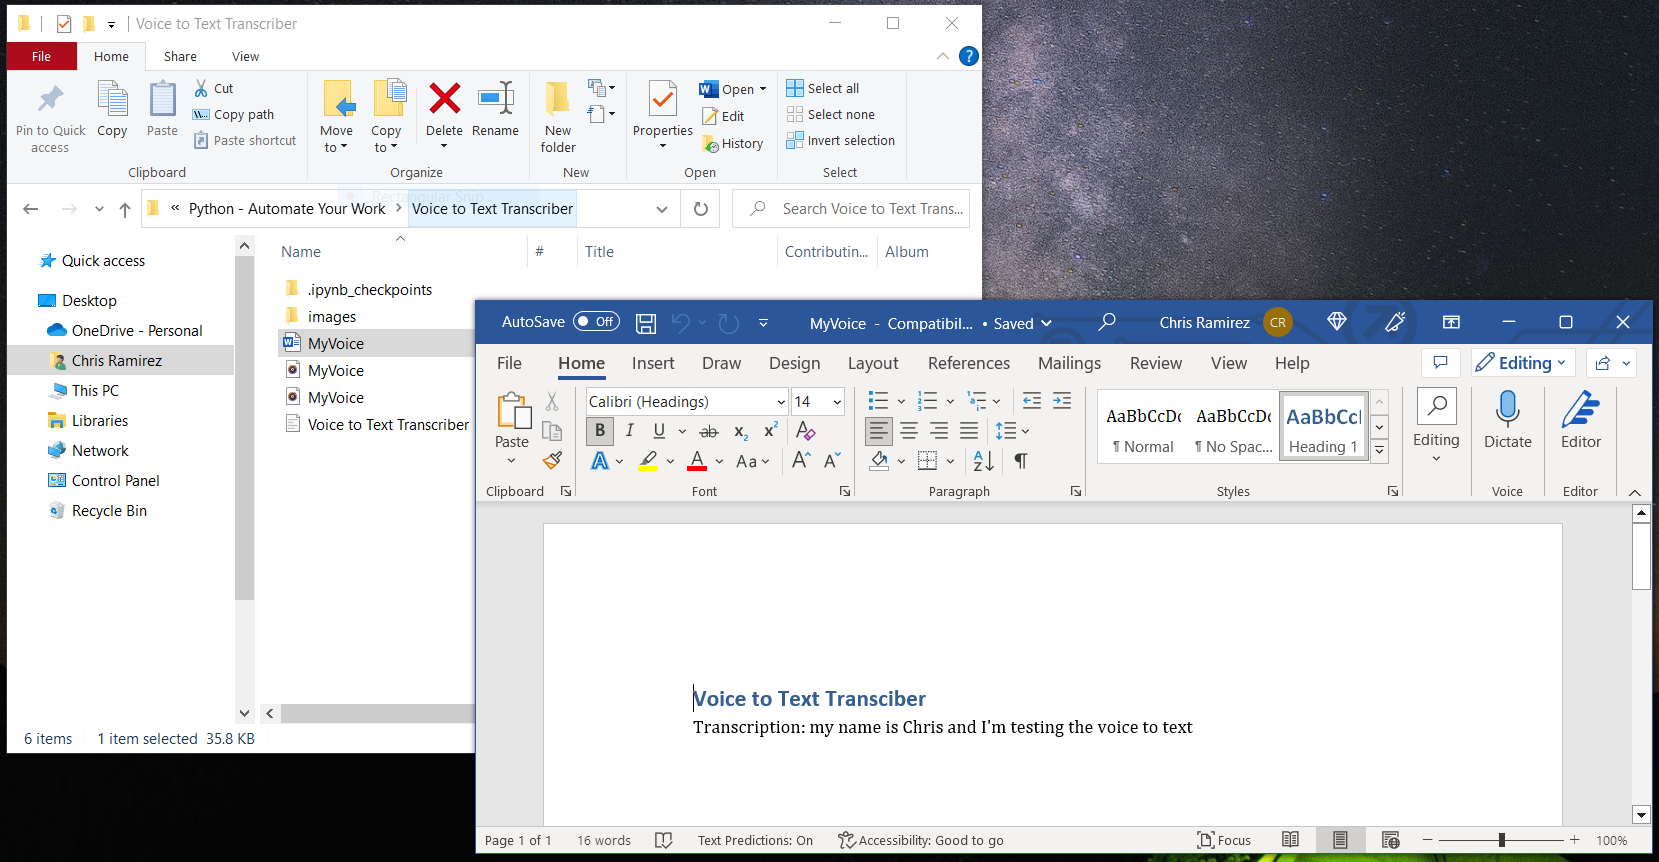

### 9. Below is the desired output from the Voice to Text Transcriber.

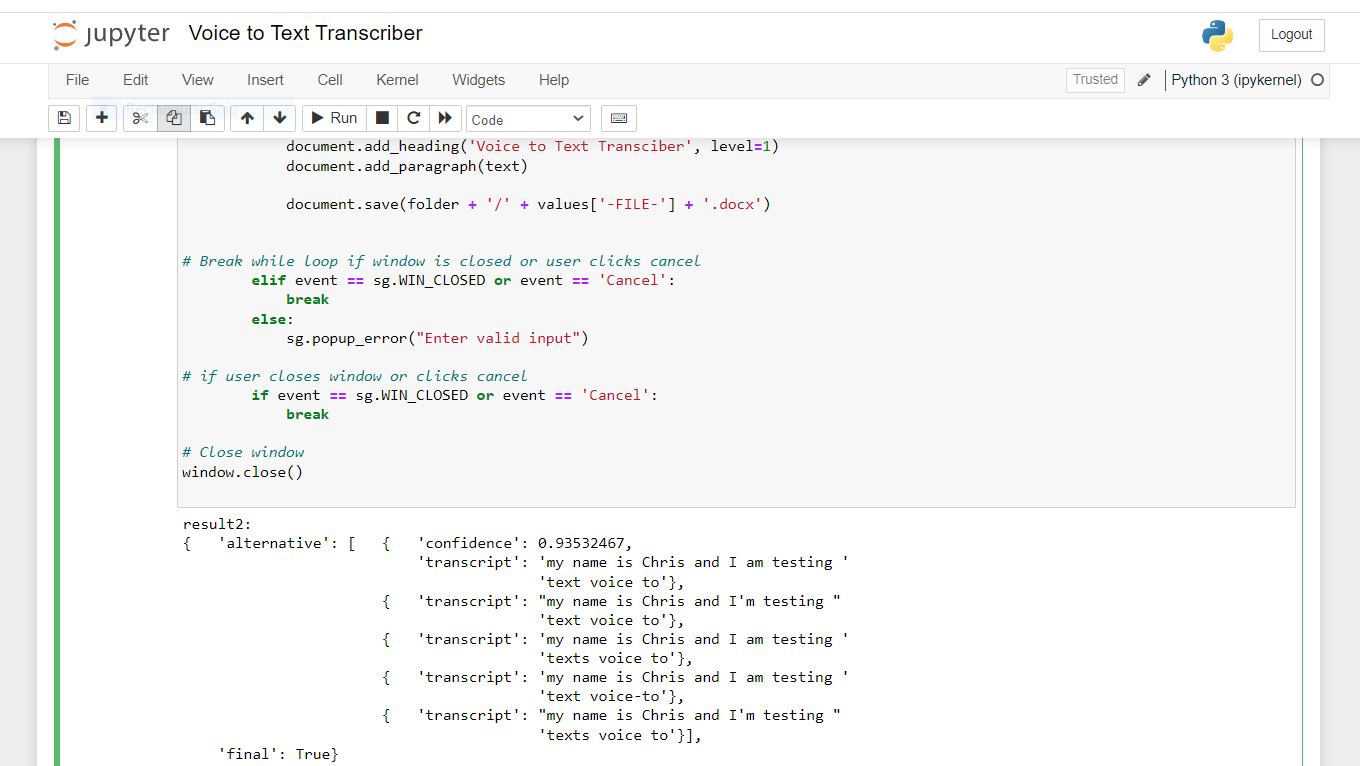